In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

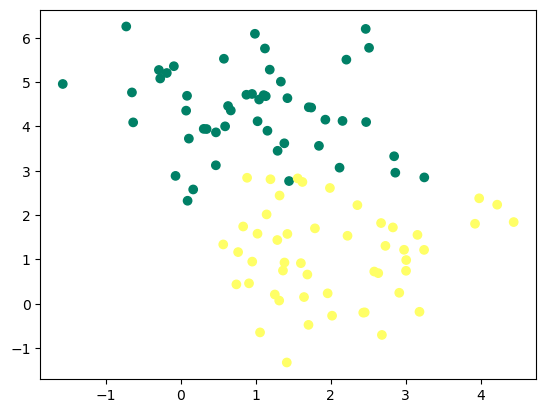

In [56]:
X,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y=y.reshape(y.shape[0],1)
plt.scatter(x[: ,0],x[: ,1],c=y,cmap='summer')
plt.show()

In [57]:
def initialisation(X):
    w=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (w,b)
def model(X,W,b):
    z=X.dot(W)+b
    a=1/(1+np.exp(-z))
    return a
def log_loss(a,y):
    return -np.sum(y*np.log(a)+(1-y)*np.log(1-a))/len(y)
def gradient(a,x,y):
    dw=np.dot(x.T,(a-y))/len(y)
    db=np.sum((a-y))/len(y)
    return dw,db
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradient(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print("accuracy ",accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)
    


accuracy  0.89


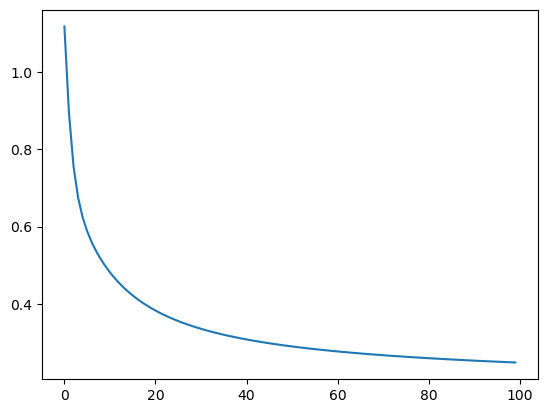

In [58]:
W, b = artificial_neuron(X, y)